In [173]:
import numpy as np
import matplotlib.pyplot as plt

In [174]:
import os
import shutil
import time

# Plot Space average of u(t)

In [175]:
dt = 0.01
tspan = 1000
tspan/dt

100000.0

In [176]:
dx = 0.1
L = 100
L0 = L/3

In [177]:
title = "1D Stripe\n$C = 1$\ndt = " + str(dt) + " dx = " + str(dx)

# Motion by curvature

The simmetry of the problems is such that
$$\Delta = \partial_xx + \partial_yy = \partial_yy$$

So we recover the 1D TDGL.

This means that we expect the stripe to **shrink very slowly** if $C$ is constant.
$$l(t) = \frac12\ln{(e^{2l(0)}-48t)}$$

We can calculate the domain lenght along y ($l$) from the area of the +1 domain.

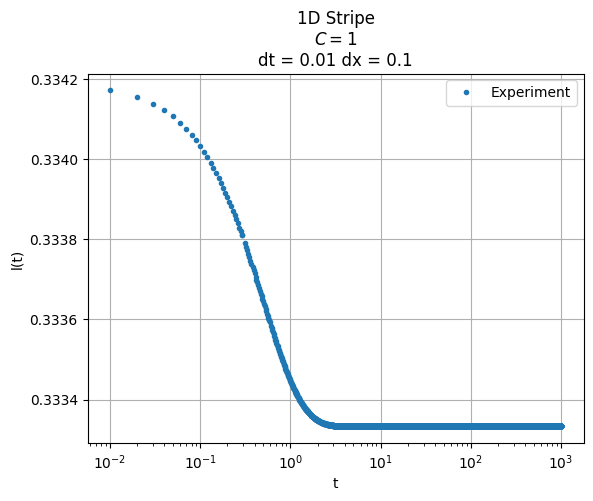

In [178]:
f = open("../fileAveout.dat", "r")
N = int(round(tspan/dt))
tt = np.zeros(N)
ave = np.zeros(N)

i = 0
for row in f:
    a, b = row.split(" ")
    tt[i] = float(a)
    ave[i] = float(b)
    #print(ave[i])
    i = i + 1

if(N-i != 0):
    print("WARNING: dt or tspan is incorrect!")

# Calculate the radius (by exploiting tanh, and we expect even corrections to it, are ODD in (r-R))
area = (ave+np.ones(N))*L/2
l = np.zeros(len(area))                # exponential of 2*lenght
for i in np.arange(0, len(area)):
    l[i] = area[i]/L
    #print(str(area[i]) + " " + str(i))

# Times to plot
ts = np.arange(0, tt[len(tt)-1], dt)
ns = np.arange(0, len(ts))
for i in np.arange(0,len(ns)):
    ns[i] = int(ts[i]/dt)
#ts = np.arange(0, i, int(T/dt))

# Motion by curvature
fig, ax = plt.subplots()
ax.plot(tt[ns], l[ns],'.', label="Experiment")
ax.set_xlabel("t")
ax.set_ylabel("l(t)")
ax.grid()
ax.set_title(title)

# Analytical expected result
#e2l_anal = -48*tt
#ax.plot(tt[ns], e2l_anal[ns], "--", label="Analytical kink collapse")

# Calculate the average over a period
T = 25
nT = int(T/dt)  # Number of steps corresponding to a period
e2lave = np.zeros(len(l)-nT)
nsave = np.arange(0,len(tt)-nT)
for i in np.arange(0, len(l)):
    if i >= nT:
        e2lave[i-nT] = np.average(l[ns[i-nT]:ns[i]])
        nsave[i-nT] = ns[int(i-nT/2)]
#ax.plot(tt[nsave], e2lave, "--", label="Average over [t+-T/2]")

ax.set_xscale("log")
#ax.set_yscale("log")
ax.legend()
t_min = 40
t_max = t_min + 2/25
#ax.set_xlim(t_min,t_max)
#ax.set_ylim(544,548)

In [179]:
np.exp(2*L0) - 48*100

8.973574241179221e+28

# Plot final state u(x, tmax)

In [180]:
f = open("../state.dat", "r")
N = int(L/dx)
x = np.zeros(N)
y = np.zeros(N)
Z = np.zeros((N,N))
i = 0
for row in f:
    if i != 0:
        a, b, c = row.split(" ")
        #a, b = row.split("	")
        J = np.mod(i-1,N)
        I = int((i-1)/N)
        x[I] = float(a)
        y[J] = float(b)
        Z[I][J] = float(c)
    else:
        N, tmax, dx = row.split(" ")
        dx = float(dx)
        N = int(N)

    i = i + 1

#x = x[0:i-1]
#y = y[0:i-1]

# Make up some fake data
X,Y = np.meshgrid(x,y)

fig = plt.figure(figsize = (6.5,5))
fig.subplots_adjust(wspace=0.3)

# Blues
#plt.figure(figsize=(10,10))
plt.pcolormesh(X, Y, Z, cmap=plt.cm.get_cmap('Blues'), vmin=-1, vmax=1)
plt.colorbar()
#plt.axis([-3, 3, -3, 3])
plt.title('t = ' + str(tmax))

FileNotFoundError: [Errno 2] No such file or directory: '../state.dat'